# Random Forest Regressor

[Taking a cue from this article](https://github.com/WillKoehrsen/Data-Analysis/blob/master/random_forest_explained/Random%20Forest%20Explained.ipynb)

[Berkley Random forest in detail](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm)

A simple approach to the accraucy from 93%(Currently in the article) to 94% with, using modular code and then try MLFLOW for the same.<br>
3 Fold objective, develop working knowledege of RandomForest, Use classes and methods to modularise code and MLflow to maintain experiments. 

__Features of Random Forest__
1. It is unexcelled in accuracy among current algorithms.
2. It runs efficiently on large data bases.
3. It can handle thousands of input variables without variable deletion.
4. It gives estimates of what variables are important in the classification.
5. It generates an internal unbiased estimate of the generalization error as the forest building progresses.
6. It has an effective method for estimating missing data and maintains accuracy when a large proportion of the data are missing.
7. It has methods for balancing error in class population unbalanced data sets.
8. Generated forests can be saved for future use on other data.
9. Prototypes are computed that give information about the relation between the variables and the classification.
10. It computes proximities between pairs of cases that can be used in clustering, locating outliers, or (by scaling) give interesting views of the data.
11. The capabilities of the above can be extended to unlabeled data, leading to unsupervised clustering, data views and outlier detection.
12. It offers an experimental method for detecting variable interactions.

[Josh Starmer RF P1](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ)<br>
[Josh Starmer RF Missing data](https://www.youtube.com/watch?v=nyxTdL_4Q-Q)

__Hyper parameters__
1. n_estimators = number of trees in the foreset
2. max_features = max number of features considered for splitting a node. (square root of total features)
3. max_depth = max number of levels in each decision tree
4. min_samples_split = min number of data points placed in a node before the node is split
5.  min_samples_leaf = min number of data points allowed in a leaf node
6. bootstrap = method for sampling data points (with or without replacement)

[Is scaling required for RF](https://stackoverflow.com/questions/8961586/do-i-need-to-normalize-or-scale-data-for-randomforest-r-package)?<br>
No, the computation is not based on distance which is not the case. Also if you have complex nonlinear relationships in p-dimensional space and you have transformed your data, when you back-transform y these nonlinearities are not reflected in the estimate, so scaling data is harmful as well. 

[Link to Data](https://raw.githubusercontent.com/chrisdmell/DataScience/master/data_dump/temps.csv)<br>
[Link to the inspiration](https://github.com/WillKoehrsen/Data-Analysis/blob/master/random_forest_explained/Random%20Forest%20Explained.ipynb)<br>
[Part 2](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)<br>
[Part 1](https://github.com/WillKoehrsen/Data-Analysis/blob/master/random_forest_explained/Random%20Forest%20Explained.ipynb)<br>

_Explore_
1. The out-of-bag (oob) error estimate
2. How does a RF calculate variable importance?
3. GINI and entropy.

##### Import Utils

In [18]:
%run utils/utils_funcs.ipynb

##### Import RF regressor model

In [153]:
%run setup/rf_model_regression.ipynb

In [5]:
data_location = 'https://raw.githubusercontent.com/chrisdmell/DataScience/master/data_dump/temps.csv'

In [6]:
weather_df = Utils.load_data(data_location)
weather_df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [7]:
Utils.df_attributes(weather_df)

Dataframe Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB
None
Dataframe Describe Method
         year       month         day      temp_2      temp_1     average  \
count   348.0  348.000000  348.000000  348.000000  348.000000  348.000000   
m

What do the columns mean?
1. year: 2016 for all data points
2. month: number for month of the year
3. day: number for day of the year
4. week: day of the week as a character string
5. temp_2: max temperature 2 days prior
6. temp_1: max temperature 1 day prior
7. average: historical average max temperature
8. actual: max temperature measurement
9. friend: your friend’s prediction, a random number between 20 below the average and 20 above the average

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'temp_2'}>,
        <AxesSubplot:title={'center':'temp_1'}>,
        <AxesSubplot:title={'center':'average'}>],
       [<AxesSubplot:title={'center':'actual'}>,
        <AxesSubplot:title={'center':'forecast_noaa'}>,
        <AxesSubplot:title={'center':'forecast_acc'}>],
       [<AxesSubplot:title={'center':'forecast_under'}>,
        <AxesSubplot:title={'center':'friend'}>, <AxesSubplot:>]],
      dtype=object)

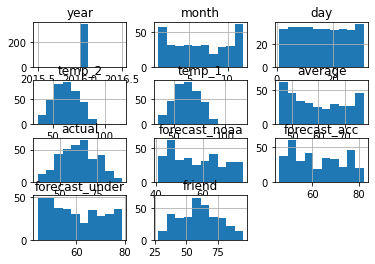

In [8]:
Utils.hist_flt_int(weather_df)

#### TODO - Plotting methods and class. 

In [9]:
# Use datetime for dealing with dates
import datetime

# Get years, months, and days
years = weather_df['year']
months = weather_df['month']
days = weather_df['day']

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

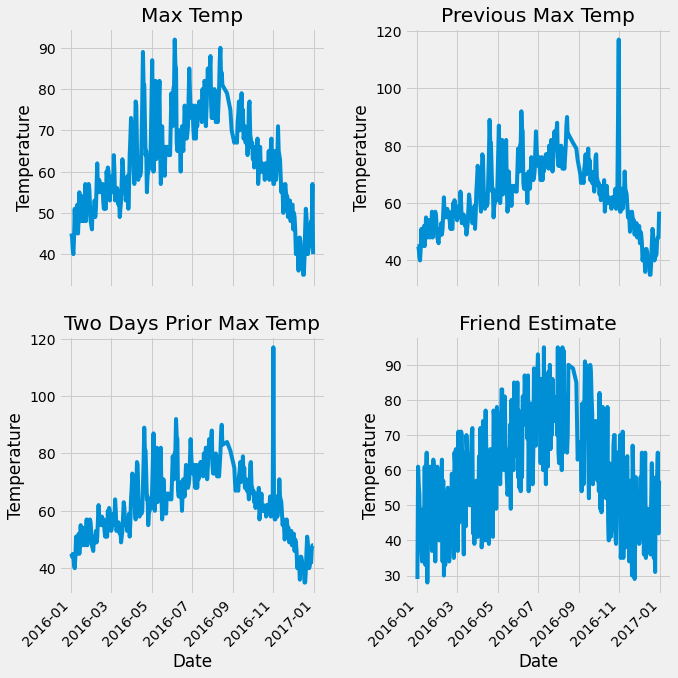

In [10]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.autofmt_xdate(rotation = 45)

# Actual max temperature measurement
ax1.plot(dates, weather_df['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

# Temperature from 1 day ago
ax2.plot(dates, weather_df['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

# Temperature from 2 days ago
ax3.plot(dates, weather_df['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

# Friend Estimate
ax4.plot(dates, weather_df['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

[Why one hot encoding is bad in tree based models](https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769). So even though we have categorical variables, RF is robust enough to handle categoricals so no need to encode. Even for continuous variables, there is no need to scale data. RF is robust to missing values as well. 

TODO: RF with missing values. 

### Experiment 001

In [188]:
# features_weeks = pd.get_dummies(features.week)
## Using average of acutal temp isnt the best way to do it.
features_to_keep = weather_df[["temp_2", "temp_1", "average", "actual"]]

In [53]:
rf_model = RF_regressor.new_instance()

In [50]:
help(RF_regressor.model_run)

Help on function model_run in module __main__:

model_run(self, df, var_dict, other_dict={})
    self : rf regressor model
    df : dataframe
    var_dict : model variables dict - var_dict["independant"], var_dict["dependant"]
    other_dict : other dict if needed, set to {} default



In [54]:
var_dict = {}
var_dict["independant"] = ["temp_2", "temp_1", "average"]
var_dict["dependant"]   = ["actual"]
rf_model_output = rf_model.model_run(features_to_keep, var_dict)

<ipython-input-52-e4cd2518dae8>:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._rfr.fit(X_train, y_train)


In [55]:
rf_model_output

{'mae': 3.8574712643678155,
 'mse': 24.85623908045977,
 'rmse': 4.985603181206841,
 'r2': 0.8212666456396088,
 'model': RandomForestRegressor(oob_score=True)}

In [58]:
model = rf_model_output["model"]

In [59]:
model.feature_importances_

array([0.05495073, 0.73126142, 0.21378784])

In [60]:
model.oob_score_  #R2 

0.7890564887200888

In [62]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Experiment 002

In [189]:
rf_model_cv = RF_regressor.new_instance()
## the advantage is to call the class and not the instance, so we I can again call the RF regressor without needing to 
## class itself to create an instance

In [132]:
display(rf_model_cv.model)
display(rf_model_cv.params)
## as the model as no params set the is an attribute error

## @ property decorators are used to make the methods as attributes. 

RandomForestRegressor(oob_score=True)

AttributeError: 'RF_regressor' object has no attribute '_params'

In [133]:
help(RF_regressor.model_run_cv)

Help on function model_run_cv in module __main__:

model_run_cv(self, df, var_dict, other_dict={})
    self : rf regressor model
    df : dataframe
    var_dict : model variables dict - var_dict["independant"], var_dict["dependant"]
    other_dict : other dict if needed, set to {} default - other_dict["parameters"], other_dict["scoring"], 
    other_dict["cv"]
    
    neg_mean_absolute_error - we have to minimize mae, but sklearn works rf on maximization so we negative this



In [134]:
var_dict = {}
var_dict["independant"] = ["temp_2", "temp_1", "average"]
var_dict["dependant"]   = ["actual"]

other_dict = {}
other_dict["parameters"]  = {
    'bootstrap': [True],   ## if the data used should be bootstrapped
    'max_depth': [110, 120, None],  # max depth of individial trees
    'max_features': [3], # max features used for each tree
    'min_samples_leaf': [20,25,30],  #min samples at leaf
    'min_samples_split': [10], # minimum samples used to split
    'n_estimators': [75, 100, 125], # no of trees
    'random_state':[50]
}

other_dict["scoring"] = "neg_mean_absolute_error"
other_dict["cv"] = 10

rf_model_output_cv = rf_model_cv.model_run_cv(features_to_keep, var_dict, other_dict)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   26.0s finished
C:\Users\chris.dmello\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [138]:
rf_model_output_cv

## model score is negative because we have neg_mae, 


{'mae': 3.6776893719802306,
 'mse': 22.57917131760773,
 'rmse': 4.7517545514901895,
 'r2': 0.8376403197921238,
 'model_score': -3.6776893719802306,
 'model': GridSearchCV(cv=10, estimator=RandomForestRegressor(oob_score=True), n_jobs=-1,
              param_grid={'bootstrap': [True], 'max_depth': [110, 120, None],
                          'max_features': [3], 'min_samples_leaf': [20, 25, 30],
                          'min_samples_split': [10],
                          'n_estimators': [75, 100, 125], 'random_state': [50]},
              scoring='neg_mean_absolute_error', verbose=2),
 'y_test':      actual
 255      66
 114      61
 314      52
 268      66
 167      70
 ..      ...
 152      81
 165      67
 261      66
 60       57
 338      45
 
 [87 rows x 1 columns],
 'y_pred': array([69.14706072, 61.93695836, 51.81878086, 62.41158494, 65.20076342,
        74.90914156, 77.54216058, 77.54216058, 61.36837482, 75.21979887,
        62.47563709, 75.20544471, 44.37845905, 63.45706353, 

In [135]:
model_cv = rf_model_output_cv["model"]

In [136]:
model_cv.best_params_

## Best Params of the CV

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 20,
 'min_samples_split': 10,
 'n_estimators': 100,
 'random_state': 50}

### Experiment 003
> Run with the best params

In [162]:
rf_model_best = RF_regressor.new_instance(model_cv.best_params_)

In [163]:
display(rf_model_best.model)
display(rf_model_best.params)

RandomForestRegressor(max_depth=110, max_features=3, min_samples_leaf=20,
                      min_samples_split=10, oob_score=True, random_state=50)

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 20,
 'min_samples_split': 10,
 'n_estimators': 100,
 'random_state': 50}

In [164]:
help(RF_regressor.model_run)

Help on function model_run in module __main__:

model_run(self, df, var_dict, other_dict={})
    self : rf regressor model
    df : dataframe
    var_dict : model variables dict - var_dict["independant"], var_dict["dependant"]
    other_dict : other dict if needed, set to {} default



In [165]:
var_dict = {}
var_dict["independant"] = ["temp_2", "temp_1", "average"]
var_dict["dependant"]   = ["actual"]

rf_model_best = rf_model_best.model_run(features_to_keep, var_dict)

<ipython-input-153-f24ec669b599>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._rfr.fit(X_train, y_train)


In [166]:
rf_model_best

{'mae': 3.6776893719802306,
 'mse': 22.57917131760773,
 'rmse': 4.7517545514901895,
 'r2': 0.8376403197921238,
 'model': RandomForestRegressor(max_depth=110, max_features=3, min_samples_leaf=20,
                       min_samples_split=10, oob_score=True, random_state=50),
 'y_test':      actual
 255      66
 114      61
 314      52
 268      66
 167      70
 ..      ...
 152      81
 165      67
 261      66
 60       57
 338      45
 
 [87 rows x 1 columns],
 'y_pred': array([69.14706072, 61.93695836, 51.81878086, 62.41158494, 65.20076342,
        74.90914156, 77.54216058, 77.54216058, 61.36837482, 75.21979887,
        62.47563709, 75.20544471, 44.37845905, 63.45706353, 70.34984123,
        55.70679697, 62.53126376, 56.6617349 , 57.52990642, 75.80901747,
        64.53561824, 55.09053779, 63.44675847, 61.85841411, 58.0571196 ,
        52.10998135, 64.58363963, 44.56059527, 59.85272505, 77.37002634,
        72.12896191, 63.56012119, 54.48878203, 77.54216058, 75.11311325,
        60.33

In [159]:
model_best = rf_model_best["model"]

### Comparison Between RF class and GridsearchCV class metrics and how to use them

> R2 score

In [167]:
display(rf_model_best["r2"])
display(rf_model_output_cv["r2"])

## For grid         y_pred = grid_search_ad.predict(X_test)
## For RF y_pred = self._rfr.predict(X_test)

0.8376403197921238

0.8376403197921238

> MAE

In [169]:
display(rf_model_best["mae"])
display(rf_model_output_cv["mae"])
display(rf_model_output_cv["model_score"]) ## from the score method r2_2 = grid_search_ad.score(X_test, y_test)

## for CV as the score parameter was -MAE, we get the the negative value. 

    ## Both MAE values are calculated using sklearn metrics

3.6776893719802306

3.6776893719802306

-3.6776893719802306

> Best Score <br>

The RF model doesnt have a best score but the CV method returns the best score, which is the mean test scores across various folds, the test score in this case in MAE. <br>

As the magnitude CV test_score and the Test set test_score isnt large we can consider that, the model gneralizes well across datasets.  

In [170]:
display(rf_model_output_cv["model"].best_score_)

## The grid.best_score_ is the average of all cv folds for a single combination of the parameters you specify in 
## the tuned_params.


-4.032625063857787

[GridsearchCV best score](https://stackoverflow.com/questions/30442259/why-does-not-gridsearchcv-give-best-score-scikit-learn)

In [175]:
results = pd.DataFrame(rf_model_output_cv["model"].cv_results_)
df_res = results[results["mean_test_score"] == rf_model_output_cv["model"].best_score_]

display(df_res)

display(df_res.columns)
## The CV grid combinations result

## the best is chosen where you have the smallest trees in this case 110

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1,0.295012,0.009983,0.018051,0.003901,True,110,3,20,10,100,...,-4.774908,-4.332194,-3.442213,-3.707914,-4.088164,-3.775637,-4.109681,-4.032625,0.566605,1
10,0.364924,0.059960,0.019049,0.002872,True,120,3,20,10,100,...,-4.774908,-4.332194,-3.442213,-3.707914,-4.088164,-3.775637,-4.109681,-4.032625,0.566605,1
19,0.377091,0.047575,0.025632,0.022726,True,None,3,20,10,100,...,-4.774908,-4.332194,-3.442213,-3.707914,-4.088164,-3.775637,-4.109681,-4.032625,0.566605,1


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_bootstrap', 'param_max_depth', 'param_max_features',
       'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'param_random_state', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [187]:
rf_model_output_cv["model"].best_index_

## we can call the best_index method to get the Index of the best model parameters. In this case its 1. 

1

> CV best params



In [177]:
rf_model_output_cv["model"].best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 20,
 'min_samples_split': 10,
 'n_estimators': 100,
 'random_state': 50}

> OOB score

GridsearchCV doesnt have OOB scores, but we can use the best parameters to create an RF and get the OOB score. RF model returns OOB score, when param is set True. 

Mathematically OOB score is equal to R2 of a RF model. We can see that 0.81 and 0.83 are oob_score_ and sklearn.metrics.r2 respectively.  

OOBscore can be used if you don’t have enough data to split for train and validation set. The OOBscore works only with bootstrapping.




In [179]:
display(rf_model_best["model"].oob_score_)
display(rf_model_output_cv["model"].oob_score_) 

0.8131068166489794

AttributeError: 'GridSearchCV' object has no attribute 'oob_score_'

> Score Method

RF score method is the R2 and it cannot be [changed](https://stackoverflow.com/questions/35952016/change-default-randomforestclassifiers-score-function-when-fitting-the-model). The best way is to wrap it in gridsearchCV.

In [182]:
## as we do not have the X_test value creating, it again, with different random seed. 
df = features_to_keep
feature = var_dict["independant"]
label   = var_dict["dependant"]
X = df[feature]
y = df[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 100)

In [183]:
display(rf_model_best["model"].score(X_test , y_test))       ## R2 value
display(rf_model_output_cv["model"].score(X_test , y_test))  ## MAE

0.8781218864415125

-3.099785174148809

__Spliting Condition__<br>
I think there is a confusion between classification (i.e: finding the probability of being in a certain class) and regression (i.e: finding a continuous value as a prediction).

For classification, one should use Gini index or cross-entropy. It builds a split by measuring the impurity in the created leaves.

For regression, one could use mean squared error. This cost function builds a split by taking the average value of the response in the leaves and comparing it to the individuals that fall into each leaf.

[Tune RF hyperparamters](https://www.kaggle.com/general/4092)

##### What if we had a way to log all metrics and models and pack them into differnt folders and tag them and call them as nned.

This is where __MLFLOW__ comes in. 

[mlflow gridsearch implementation.](https://gist.github.com/liorshk/9dfcb4a8e744fc15650cbd4c2b0955e5)

TODO.

#### TODO: Model Feature Importance